In [305]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [306]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [307]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [308]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


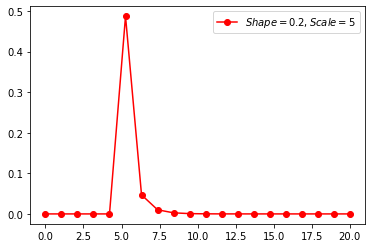

In [309]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [310]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [311]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


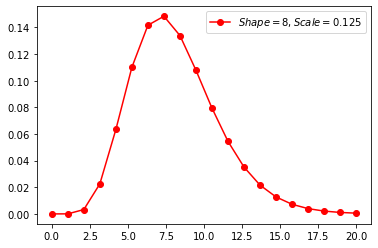

In [312]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

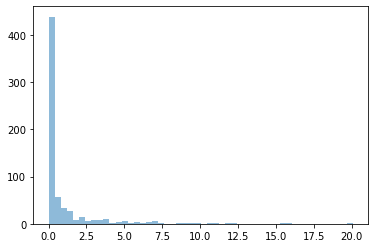

[7.45819466e-02 2.19144622e-01 4.01224177e-05 9.56288251e+00
 4.50284060e-03 5.80534617e-05 3.96044903e-01 4.57400422e-02
 8.47097573e-01 7.26601425e-01 2.51540429e-01 2.51418018e-01
 2.16203013e-02 3.61395252e+00 5.84746461e-02 4.57711759e-01
 1.21771373e-03 4.20454353e-02 3.97125709e+00 7.16416935e-01
 6.20877094e-02 1.57712515e-05 9.14321886e-01 3.37384436e-02
 1.62252222e-07 7.76294507e-02 2.95005176e-01 9.41930083e-03
 6.51942064e+00 8.97257275e-06 5.61268586e-03 6.28588015e-02
 8.75260214e-03 3.86954502e-03 6.17435220e+00 1.92557319e-01
 3.00652308e+00 4.09783490e-05 4.65498192e+00 1.96174914e+00
 1.35584833e-05 4.58434597e-06 4.67838434e-02 2.96891518e-02
 3.69255901e-02 2.31596188e+00 3.58708087e-02 8.62151850e-06
 1.84201217e-07 6.09056199e-04 5.13519649e-02 3.74718236e-02
 1.58281477e+00 5.92465845e-04 1.30259308e-04 2.10775090e-01
 3.76859295e-02 1.38836277e+01 4.44689843e-01 1.42689686e+00
 3.30160395e-01 1.80266637e+00 6.52647798e-03 4.98502808e-06
 8.52786146e-06 2.064514

In [313]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

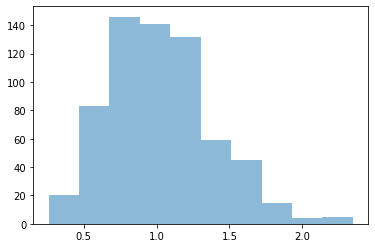

In [314]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [315]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [316]:
random.uniform(0,1)

0.9255670700415055

In [331]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_2021(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year (2021)
    def get_random_length_2021(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        #else:
            #lifespan_x=0
        age_i_2021= self.age[0] #self.get_random_age_2021()
        age_i_t=0
        age_i_t_array=[]
        for t in range (2021,2021+underground_line['lifespan']):
            if age_i_2021<=lifespan_x:
                age_i_t= (age_i_2021)+(t-2021)
                age_i_t_array.append(age_i_t)
            elif age_i_2021-lifespan_x==1:
                age_i_t=1
                age_i_t_array.append(age_i_t)
            elif age_i_2021-lifespan_x>1:
                age_i_t=(age_i_t)+1
                age_i_t_array.append(age_i_t)
        return(age_i_t_array)
    def get_current_age(self):
        current_age=self.get_age_array[-1]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        if self.underground==[0]:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif self.underground==[1]:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (2021,2021+underground_line['lifespan']):
            if t==2021:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_StatusQuo_i=0
        for t in range (2021,2021+underground_line['lifespan']):
            replcost_x_t= replcost_x[t]
            age_i_t=age_i[t]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                capex_StatusQuo_i=0
        return (capex_StatusQuo_i)
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t (self):
        #over_or_under = self.get_underground()
        age_i=self.get_age_array()
        replcost_x_t=self.get_replcost_x_t()
        if self.underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif self.underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (2021,2021+underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i (self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,2021+underground_line['lifespan']):
            opex_x_t=opex_x[t]
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_2021=self.get_random_age_2021()
        age_2021_i=age_2021[0]
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x=overhead_line['lifespan']
        elif self.underground==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #over_or_under= self.get_underground()
        if self.underground==0:
            self.underground=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.get_replcost_x_t()
        for t in range (2021,2021+underground_line['lifespan']):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        #over_or_under= self.get_underground()
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (2021,2021+underground_line['lifespan']):
            opex_x_t=opex_x[t]
            if  self.underground==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    self.underground==1
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,2021+underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (2021,2021+underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_2021()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [332]:
circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_random_age_2021=circuit_i.get_random_age_2021
print(circuit_random_age_2021)
circuit_random_length_2021=circuit_i.get_random_length_2021
print(circuit_random_length_2021)
circuit_age_2021=circuit_i.get_random_age_2021()
print (circuit_age_2021)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#circuit_age_i_t_list
#age_i_t=circuit_i.get_current_age()
#print(age_i_t)
#circuit_age_i_t_current age
#print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[0]
<bound method Circuit.get_random_age_2021 of <__main__.Circuit object at 0x000001E4BA51B700>>
<bound method Circuit.get_random_length_2021 of <__main__.Circuit object at 0x000001E4BA51B700>>
[0.12787837285506803]
[0.12787837285506803, 1.127878372855068, 2.127878372855068, 3.127878372855068, 4.127878372855068, 5.127878372855068, 6.127878372855068, 7.127878372855068, 8.127878372855069, 9.127878372855069, 10.127878372855069, 11.127878372855069, 12.127878372855069, 13.127878372855069, 14.127878372855069, 15.127878372855069, 16.12787837285507, 17.12787837285507, 18.12787837285507, 19.12787837285507, 20.12787837285507, 21.12787837285507, 22.12787837285507, 23.12787837285507, 24.12787837285507, 25.12787837285507, 26.12787837285507, 27.12787837285507, 28.12787837285507, 29.12787837285507, 30.12787837285507, 31.12787837285507, 32.127878372855065, 33.127878372855065, 34.127878372855065, 35.127878372855065, 36.127878372855065, 37.127878372855065, 38.127878372855065, 39.127878372855065, 40.127

In [333]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_2021=circuit_i.get_random_age_2021()
    #print (circuit_age_2021)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [0] & Segment age in 2021= [0.09868918744369799] & Segment age in t= [0.09868918744369799, 1.098689187443698, 2.098689187443698, 3.098689187443698, 4.098689187443698, 5.098689187443698, 6.098689187443698, 7.098689187443698, 8.098689187443698, 9.098689187443698, 10.098689187443698, 11.098689187443698, 12.098689187443698, 13.098689187443698, 14.098689187443698, 15.098689187443698, 16.098689187443696, 17.098689187443696, 18.098689187443696, 19.098689187443696, 20.098689187443696, 21.098689187443696, 22.098689187443696, 23.098689187443696, 24.098689187443696, 25.098689187443696, 26.098689187443696, 27.098689187443696, 28.098689187443696, 29.098689187443696, 30.098689187443696, 31.098689187443696, 32.098689187443696, 33.098689187443696, 34.098689187443696, 35.098689187443696, 36.098689187443696, 37.098689187443696, 38.098689187443696, 39.098689187443696, 40.098689187443696, 41.098689187443696, 42.098689187443696, 43.098689187443696, 44.098689187443696]
x= [0] & Segment age in 2021= [0.19

x= [0] & Segment age in 2021= [9.220441812823613e-07] & Segment age in t= [9.220441812823613e-07, 1.0000009220441812, 2.0000009220441815, 3.0000009220441815, 4.0000009220441815, 5.0000009220441815, 6.0000009220441815, 7.0000009220441815, 8.000000922044181, 9.000000922044181, 10.000000922044181, 11.000000922044181, 12.000000922044181, 13.000000922044181, 14.000000922044181, 15.000000922044181, 16.00000092204418, 17.00000092204418, 18.00000092204418, 19.00000092204418, 20.00000092204418, 21.00000092204418, 22.00000092204418, 23.00000092204418, 24.00000092204418, 25.00000092204418, 26.00000092204418, 27.00000092204418, 28.00000092204418, 29.00000092204418, 30.00000092204418, 31.00000092204418, 32.00000092204418, 33.00000092204418, 34.00000092204418, 35.00000092204418, 36.00000092204418, 37.00000092204418, 38.00000092204418, 39.00000092204418, 40.00000092204418, 41.00000092204418, 42.00000092204418, 43.00000092204418, 44.00000092204418]
x= [0] & Segment age in 2021= [5.2934716111581315] & 

x= [1] & Segment age in 2021= [0.0016461739273056252] & Segment age in t= [0.0016461739273056252, 1.0016461739273057, 2.0016461739273055, 3.0016461739273055, 4.0016461739273055, 5.0016461739273055, 6.0016461739273055, 7.0016461739273055, 8.001646173927305, 9.001646173927305, 10.001646173927305, 11.001646173927305, 12.001646173927305, 13.001646173927305, 14.001646173927305, 15.001646173927305, 16.001646173927305, 17.001646173927305, 18.001646173927305, 19.001646173927305, 20.001646173927305, 21.001646173927305, 22.001646173927305, 23.001646173927305, 24.001646173927305, 25.001646173927305, 26.001646173927305, 27.001646173927305, 28.001646173927305, 29.001646173927305, 30.001646173927305, 31.001646173927305, 32.001646173927305, 33.001646173927305, 34.001646173927305, 35.001646173927305, 36.001646173927305, 37.001646173927305, 38.001646173927305, 39.001646173927305, 40.001646173927305, 41.001646173927305, 42.001646173927305, 43.001646173927305, 44.001646173927305]
x= [0] & Segment age in 

In [334]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

[104000, 106080.0, 108160.0, 110240.0, 112320.0, 114400.0, 116480.0, 118560.0, 120640.0, 122720.0, 124800.0, 126880.0, 128960.0, 131040.0, 133120.0, 135200.0, 137280.0, 139360.0, 141440.0, 143520.0, 145600.0, 147680.0, 149760.0, 151840.0, 153920.0, 156000.0, 158080.0, 160160.0, 162240.0, 164320.0, 166400.0, 168480.0, 170560.0, 172640.0, 174720.0, 176800.0, 178880.0, 180960.0, 183040.0, 185120.0, 187200.0, 189280.0, 191360.0, 193440.0, 195520.0]


IndexError: list index out of range

In [335]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    first_retire_i=circuit_i.get_first_retire_i()
    print(first_retire_i)
    capex_underground_i=circuit_i.get_capex_underground_i()
    print(capex_underground_i)
    opex_underground_i=circuit_i.get_opex_underground_i()
    print(opex_underground_i)
    lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
    print(ifecyclecost_underground)
    underground_t=circuit_i.underground_t()
    print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2020.8830536177466


TypeError: 'list' object is not callable